In [ ]:
# Libraries and environment configuration
# - numpy, pandas: data manipulation and analysis
# - matplotlib, seaborn: visualization
# - warnings: suppress non-critical warnings for a cleaner output
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset from CSV into pandas DataFrame
# Ensure 'customer_segmentation.csv' is present in the notebook's working directory
df = pd.read_csv("customer_segmentation.csv")

In [ ]:
# Inspect the first rows to validate data load and get an initial sense of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [169]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [170]:
df.shape

(2240, 29)

In [171]:
# Overview of data types and non-null counts — helps identify issues that require cleaning
# Use this to confirm expected dtypes and detect missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Compute missing values per column to decide cleaning strategy
# This informs whether to drop rows, impute, or take other action

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# For reproducibility in this analysis we drop rows with missing values
# Note: In production, prefer targeted imputation or a data-quality assessment to avoid unnecessary data loss
df.dropna(inplace=True)

In [174]:
df.isna().sum().sum()

np.int64(0)

In [175]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [176]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [177]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

### Data Cleaning and Feature Eng

In [ ]:
# Convert 'Dt_Customer' to datetime for time-based feature engineering and tenure calculations
# Explicitly use dayfirst=True if dates follow D/M/Y format

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [ ]:
# Create an "Age" column from birth year. Use a fixed reference year for reproducibility (2025 here).
# For production pipelines, consider using the current date dynamically where appropriate.

df['Age'] = 2025 - df['Year_Birth'] 

In [181]:
df['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [182]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [ ]:
# Aggregate household children counts into a single, interpretable feature

df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [184]:
df['Total_Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [185]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [ ]:
# Define spending columns to be aggregated to a single 'Total_Spending' metric
# This simplifies customer value comparisons across channels

spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [ ]:
# Consolidated spending feature representing overall customer monetary value
# Useful as a primary driver of cluster segmentation and CLV proxies

df['Total_Spending'] = df[spend_cols].sum(axis=1)

In [188]:
df[['Total_Spending']]

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [ ]:
# Create customer tenure (days since first recorded interaction) as a numeric feature
# Useful to assess recency or tenure-based behaviors

df['Customer_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days

In [190]:
df['Customer_Since']

0       4867
1       4317
2       4516
3       4343
4       4365
        ... 
2235    4585
2236    4223
2237    4359
2238    4360
2239    4826
Name: Customer_Since, Length: 2216, dtype: int64

## EDA

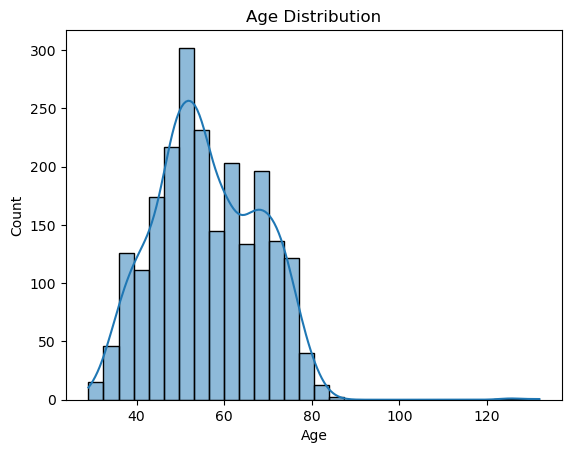

In [191]:
# Distribution of customer ages — helps identify demographic skew and age-based segments
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

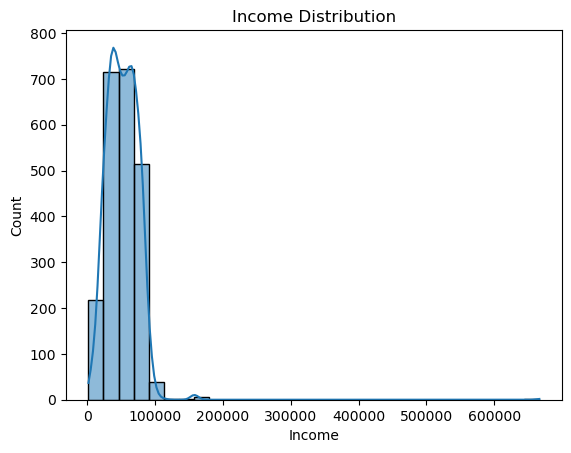

In [192]:
# Visualize Income distribution to detect skewness and outliers; informs transformation decisions
sns.histplot(df['Income'], bins = 30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

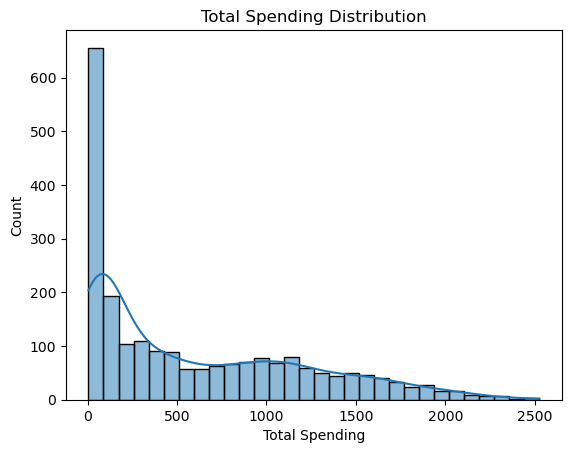

In [193]:
# Distribution of total customer spending to identify high-value vs low-value groups
sns.histplot(df['Total_Spending'], bins = 30, kde=True)
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending')
plt.show()

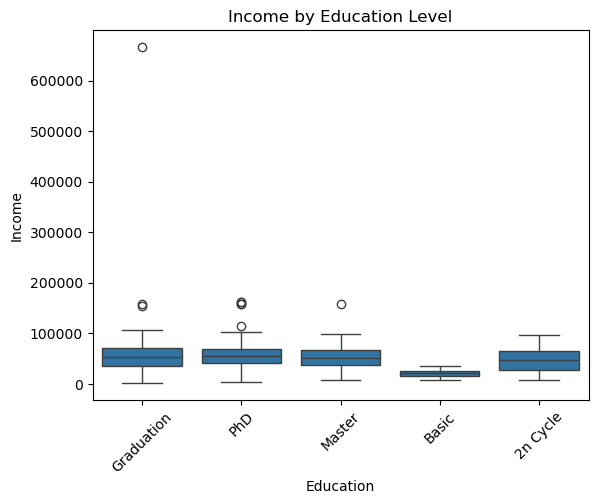

In [194]:
sns.boxplot(
    x = 'Education',
    y = 'Income',
    data = df
)
plt.xticks(rotation=45)
plt.title('Income by Education Level')
plt.show()

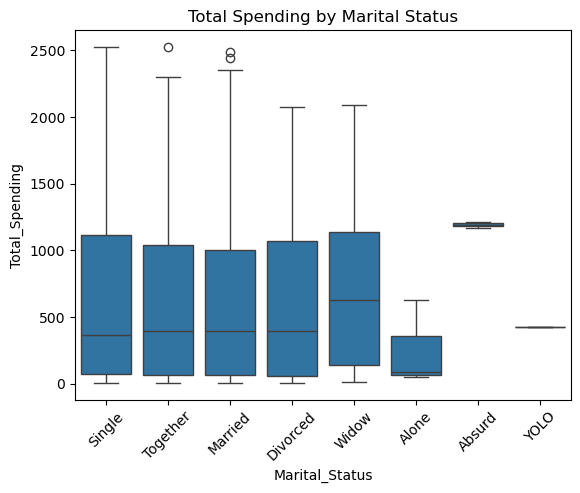

In [195]:
sns.boxplot(
    x='Marital_Status',
    y='Total_Spending', 
    data=df
)
plt.xticks(rotation=45)
plt.title('Total Spending by Marital Status')   
plt.show()

### Correlation

In [ ]:
# Compute correlation among selected numerical features to identify multicollinearity
# These relationships help interpret cluster drivers and select features

corr = df[['Age', 'Income', 'Total_Spending', 'Recency', 'NumWebPurchases', 'NumStorePurchases']].corr()

In [197]:
corr

,Age,Income,Total_Spending,Recency,NumWebPurchases,NumStorePurchases
Age,1.000000,0.161791,0.113487,0.016295,0.153051,0.127891
Income,0.161791,1.000000,0.667576,-0.003970,0.387878,0.529362
Total_Spending,0.113487,0.667576,1.000000,0.020066,0.528973,0.675181
Recency,0.016295,-0.003970,0.020066,1.000000,-0.005641,-0.000434
NumWebPurchases,0.153051,0.387878,0.528973,-0.005641,1.000000,0.516240
NumStorePurchases,0.127891,0.529362,0.675181,-0.000434,0.516240,1.000000


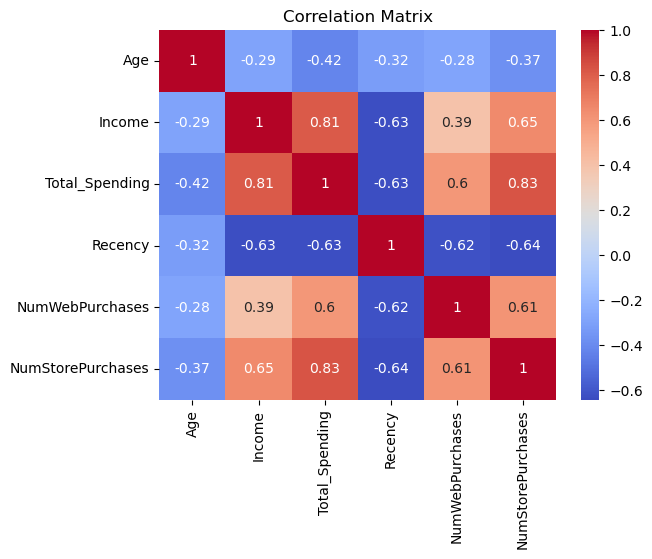

In [198]:
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [199]:
pivot_income = df.pivot_table(
    values='Income',
    index='Education',
    columns='Marital_Status',
    aggfunc='mean'
)

In [200]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


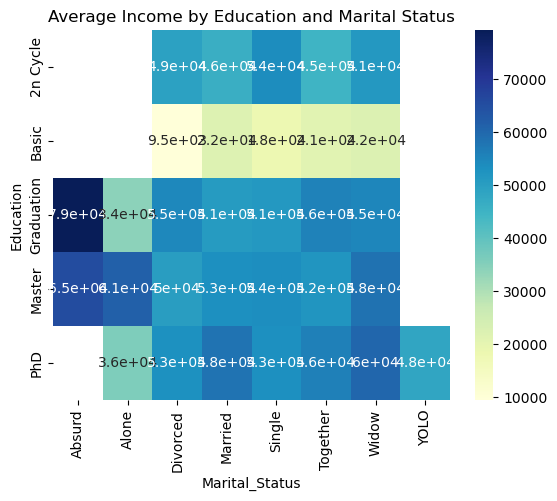

In [201]:
sns.heatmap(pivot_income, annot=True, cmap='YlGnBu')
plt.title('Average Income by Education and Marital Status')
plt.show()

In [202]:
group1 = df.groupby('Education')['Total_Spending'].mean().sort_values(ascending=False)

In [203]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

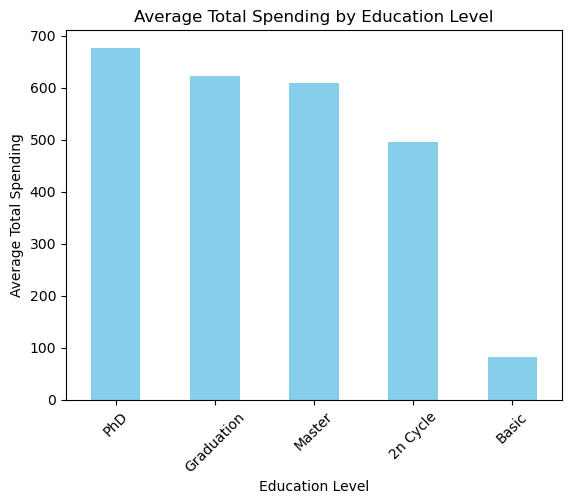

In [204]:
group1.plot(kind='bar', color = 'skyblue')
plt.title('Average Total Spending by Education Level')
plt.xlabel('Education Level')   
plt.ylabel('Average Total Spending')
plt.xticks(rotation=45)
plt.show()

In [205]:
df['AcceptedAny'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].max(axis=1)    

In [206]:
df['AcceptedAny'].unique()

array([1, 0])

In [207]:
group2 = df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending=False)

In [208]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

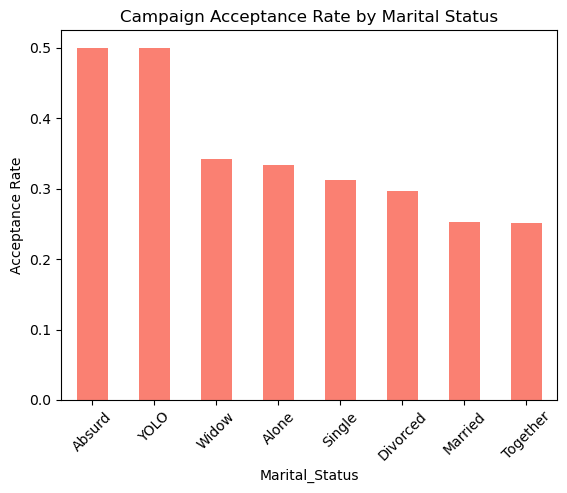

In [209]:
group2.plot(kind='bar', color='salmon')
plt.title('Campaign Acceptance Rate by Marital Status') 
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()

In [210]:
bins = [ 18, 30, 40, 50, 60, 70, 90]

In [211]:
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [212]:
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['AgeGroup']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [213]:
group3 = df.groupby('AgeGroup')['Income'].mean()

In [214]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

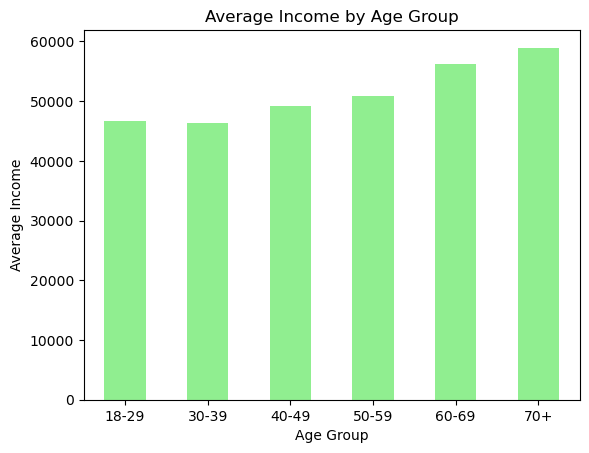

In [215]:
group3.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.xticks(rotation=0)
plt.show()

In [216]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4867,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4317,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4516,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4343,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4365,0,40-49


In [217]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [ ]:
# Select features to use for clustering: a mix of demographic and behavioral metrics
# These should capture both customer value and interaction patterns
features = ['Age', 'Income', 'Total_Spending', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']

In [219]:
X = df[features].copy()

In [220]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


## Preprocessing 

In [ ]:
# Standardize features prior to clustering to give each feature equal weight
# StandardScaler centers to mean 0 and scales to unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
# Fit the scaler on training data and transform features; store as numpy array for modeling
X_scaled = scaler.fit_transform(X)

# X_scaled is ready for distance-based algorithms such as KMeans

In [223]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [224]:
from sklearn.cluster import KMeans

In [225]:
wcss = []

In [ ]:
# Use the elbow method to evaluate within-cluster sum of squares (WCSS) for different k
# Choose k where marginal improvement in WCSS diminishes
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


In [227]:
wcss

[10218.620143748783,
 9303.349676497384,
 8159.355714963871,
 7578.217065195121,
 7102.818964506341,
 6820.512393778463,
 6445.56538152836,
 6224.740490354579,
 5728.498353682011]

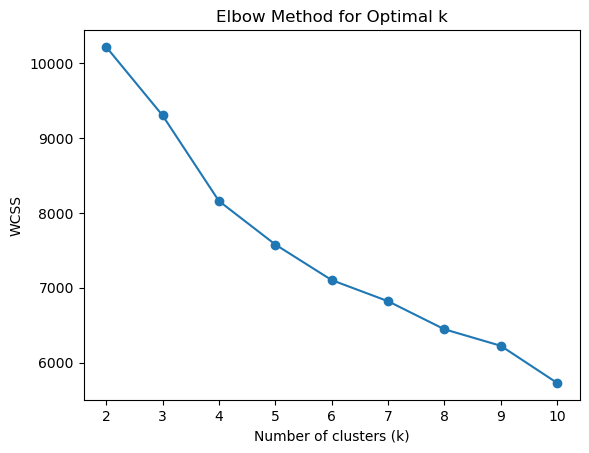

In [228]:
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Fit KMeans with selected k (6 chosen based on elbow analysis)
# Assign cluster labels back to the DataFrame for downstream analysis and interpretation
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [230]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4867,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4317,0,70+,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4516,0,50-59,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4343,0,40-49,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4365,0,40-49,2


In [ ]:
# Summarize clusters by mean feature values to interpret segment characteristics
# This helps create actionable segment profiles for marketing or product teams
cluster_summary = df.groupby('Cluster')[features].mean()

In [232]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,48.758850,32837.701327,114.064159,2.157080,3.243363,6.652655,24.429204
1,46.089820,75444.853293,1307.272455,4.763473,8.799401,2.790419,48.685629
2,49.092643,32783.937330,116.757493,2.343324,3.196185,7.065395,77.005450
3,59.727907,59554.174419,884.241860,7.858140,7.925581,6.397674,46.097674
4,68.977778,77107.879365,1205.717460,4.536508,8.225397,2.526984,52.885714
5,68.028302,43426.745283,170.496855,2.575472,4.018868,5.371069,52.097484


In [233]:
df['Cluster'].value_counts()

Cluster
0    452
3    430
2    367
1    334
5    318
4    315
Name: count, dtype: int64

In [ ]:
# Reduce dimensionality to 2 components using PCA for visualization purposes
# PCA is used only for plotting; the clustering itself uses the original scaled features
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_data[:, 0], pca_data[:, 1]

In [235]:
df['PCA1']

0       1.107519
1      -1.336734
2       1.882277
3      -1.784359
4       0.020363
          ...   
2235    1.248177
2236    0.508708
2237    1.153597
2238    1.887680
2239   -0.841821
Name: PCA1, Length: 2216, dtype: float64

In [236]:
df['PCA2']

0      -0.211760
1       0.269839
2      -1.014161
3      -0.704928
4       1.235265
          ...   
2235   -0.535766
2236   -0.141328
2237    1.150570
2238   -1.160737
2239   -0.159636
Name: PCA2, Length: 2216, dtype: float64

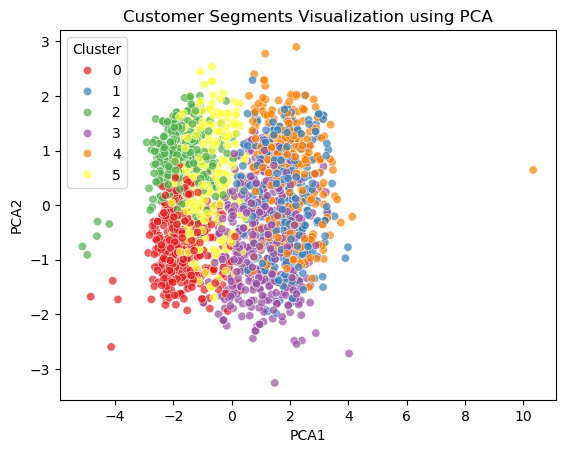

In [ ]:
# Visualize clusters in 2D PCA space to assess compactness and separation visually
# Color by cluster label to evaluate qualitative performance of segmentation
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=df,
    alpha=0.7
)

plt.title('Customer Segments Visualization using PCA')
plt.show()

In [ ]:
# silhouette score

In [238]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,48.758850,32837.701327,114.064159,2.157080,3.243363,6.652655,24.429204
1,46.089820,75444.853293,1307.272455,4.763473,8.799401,2.790419,48.685629
2,49.092643,32783.937330,116.757493,2.343324,3.196185,7.065395,77.005450
3,59.727907,59554.174419,884.241860,7.858140,7.925581,6.397674,46.097674
4,68.977778,77107.879365,1205.717460,4.536508,8.225397,2.526984,52.885714
5,68.028302,43426.745283,170.496855,2.575472,4.018868,5.371069,52.097484


## Feature Importance & Behavioral Interpretation (Cluster-wise)


### Cluster Profiles — Interpretation & Key Drivers

**Cluster 0 — Budget-Conscious Browsers**
- Below-average income and low total spending.
- Low purchase frequency across channels.
- Moderate site visits with limited conversion intent.

**Cluster 1 — Elite Omnichannel Spenders**
- Very high income and the highest total spending.
- Balanced online and strong in-store purchases.
- Low browsing activity — decisive purchasers.

**Cluster 2 — Window Shoppers**
- Very high web visits, very low spending.
- Long recency (time since last purchase).
- Likely price-sensitive or evaluating without converting.

**Cluster 3 — High-Value Loyalists**
- High online purchases and strong total spending.
- Consistent purchase cadence — good candidates for loyalty programs and upsell.

**Cluster 4 — Premium Traditionalists**
- Older demographic with higher income.
- Strong in-store preference and minimal web browsing.

**Cluster 5 — Occasional Seniors**
- Older customers with low spending and low purchase frequency.
- Lower engagement; not a primary target for acquisition spend.

**Actionable guidance:**
- Map clusters to targeted campaigns, personalization, and channel strategies.
- Validate cluster hypotheses through A/B testing and metric-driven pilots.

In [ ]:
# Persist model artifacts to disk for reuse in production or further analysis
# Save KMeans model and scaler so incoming data can be transformed and predicted consistently
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Resume Pointers — Customer Segmentation Project ✅

- Project summary: Developed a customer segmentation pipeline to identify six actionable customer segments using KMeans clustering and PCA visualization. Focused on driving targeted marketing strategies through behavioral and value-based segmentation.

- Role / Responsibilities:
  - Data cleaning and preprocessing (missing value handling, type conversion, feature engineering)
  - Feature engineering: Age, Total_Spending, Total_Children, Customer_Since
  - Exploratory data analysis and visualization to inform modeling decisions
  - Unsupervised learning: feature scaling, KMeans clustering, cluster profiling
  - Dimensionality reduction (PCA) for visual interpretation and storytelling
  - Model persistence using joblib for deployment-ready artifacts

- Tools & Techniques (Keywords for resume/LinkedIn):
  - Python, pandas, NumPy, scikit-learn, matplotlib, seaborn, joblib
  - KMeans clustering, PCA, StandardScaler, elbow method
  - Data visualization, feature engineering, EDA

- Measurable outcomes / Impact statements (examples to add to resume):
  - "Designed and implemented a KMeans-based customer segmentation model (k=6), resulting in clear customer personas for targeted marketing campaigns." 
  - "Engineered key features (Total_Spending, Customer_Tenure) and applied PCA for visual validation of cluster separability." 
  - "Delivered reusable model artifacts (scaler, model) for downstream deployment and inference." 

- Suggested metrics / further improvements to highlight (optional):
  - Cluster sizes and distribution, silhouette score, stability across time windows, uplift estimation for targeted campaigns

- Short resume bullet examples (choose 1–2):
  - "Developed and validated a customer segmentation pipeline using KMeans and PCA, producing six business-friendly segments used to prioritize marketing spend."
  - "Performed end-to-end data preparation, feature engineering, and unsupervised modeling with scikit-learn; saved production-ready artifacts for deployment."

Use these bullets to craft concise resume lines tailored to the role you're applying for (e.g., Data Scientist, Analytics Engineer, Marketing Data Analyst). Good practice: quantify outcomes where possible (e.g., expected lift, segment conversion rates).